# Intro
## General
"Data analysis is a process of inspecting, cleansing, transforming, and modeling data with the goal of discovering useful information, informing conclusions, and supporting decision-making." ([Wikipedia](https://en.wikipedia.org/wiki/Data_analysis)).

In Data Analysis, there are some analysis paradigms : **Univariate, Bivariate, Multivariate**. We apply these paradigms to analyze the features (or statistical variables, or columns of the dataframe) of the dataset and to have a better understanding.

**Numeric features** are features with numbers that you can perform mathematical operations on. They are further divided into discrete (countable integers with clear boundaries) and continuous (can take any value, even decimals, within a range).

**Categorical features** are columns with a limited number of possible values. Examples are `sex, country, or age group`.

## Notebook overview

This notebook is a guide to start practicing Data Analysis.

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# !pip install -q <lib_001> <lib_002> ...

#pip install pandas-profiling
#pip install plotly

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [2]:

# Data handling
import pandas as pd
import numpy as np


# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# EDA (pandas-profiling, etc. )
import pandas_profiling as pp

# Feature Processing (Scikit-learn processing, etc. )
import sklearn 
import scipy

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os

import warnings
warnings.filterwarnings("ignore")

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [3]:
# For CSV, use pandas.read_csv and index by date

#df_train = pd.read_csv("D:\LP2/train.csv",index_col = 0, parse_dates = True)
#df_train = pd.read_csv("D:\LP2/train.csv", parse_dates=["date"])

df_train = pd.read_csv("D:\LP2/train.csv")
df_train["date"] = pd.to_datetime(df_train["date"])

df_train.head()

id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0

In [4]:
#df_test = pd.read_csv("D:\LP2/test.csv", parse_dates=["date"])

df_test = pd.read_csv("D:\LP2/test.csv")
df_test["date"] = pd.to_datetime(df_test["date"])

df_test.head()

id       date  store_nbr      family  onpromotion
0  3000888 2017-08-16          1  AUTOMOTIVE            0
1  3000889 2017-08-16          1   BABY CARE            0
2  3000890 2017-08-16          1      BEAUTY            2
3  3000891 2017-08-16          1   BEVERAGES           20
4  3000892 2017-08-16          1       BOOKS            0

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info()`

## Main dataset for Analysis

In [5]:
#shape of data

df_train.shape, df_test.shape

((3000888, 6), (28512, 5))

In [6]:
#check for duplicates

df_train.duplicated().sum(), df_test.duplicated().sum()

(0, 0)

In [7]:
# Top 5 column of train dataset
df_train.head()

id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0

In [8]:
# Top 5 column of test dataset
df_test.head()

id       date  store_nbr      family  onpromotion
0  3000888 2017-08-16          1  AUTOMOTIVE            0
1  3000889 2017-08-16          1   BABY CARE            0
2  3000890 2017-08-16          1      BEAUTY            2
3  3000891 2017-08-16          1   BEVERAGES           20
4  3000892 2017-08-16          1       BOOKS            0

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [11]:
# check for missing values
df_train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [12]:
df_test.isna().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [13]:
# create new columns for test and train data

df_train['Year'] = df_train["date"].dt.year
df_train['Month'] = df_train["date"].dt.month_name()
df_train['Day'] = df_train["date"].dt.day_name()


df_test['Year'] = df_test["date"].dt.year
df_test['Month'] = df_test["date"].dt.month_name()
df_test['Day'] = df_test["date"].dt.day_name()


In [14]:
# Index date

df_train = df_train.set_index("date")
df_test = df_test.set_index("date")

In [15]:
df_train.head()

id  store_nbr      family  sales  onpromotion  Year    Month  \
date                                                                       
2013-01-01   0          1  AUTOMOTIVE    0.0            0  2013  January   
2013-01-01   1          1   BABY CARE    0.0            0  2013  January   
2013-01-01   2          1      BEAUTY    0.0            0  2013  January   
2013-01-01   3          1   BEVERAGES    0.0            0  2013  January   
2013-01-01   4          1       BOOKS    0.0            0  2013  January   

                Day  
date                 
2013-01-01  Tuesday  
2013-01-01  Tuesday  
2013-01-01  Tuesday  
2013-01-01  Tuesday  
2013-01-01  Tuesday

In [16]:
df_test.head()

id  store_nbr      family  onpromotion  Year   Month  \
date                                                                    
2017-08-16  3000888          1  AUTOMOTIVE            0  2017  August   
2017-08-16  3000889          1   BABY CARE            0  2017  August   
2017-08-16  3000890          1      BEAUTY            2  2017  August   
2017-08-16  3000891          1   BEVERAGES           20  2017  August   
2017-08-16  3000892          1       BOOKS            0  2017  August   

                  Day  
date                   
2017-08-16  Wednesday  
2017-08-16  Wednesday  
2017-08-16  Wednesday  
2017-08-16  Wednesday  
2017-08-16  Wednesday

## Mini Overview of project

In [17]:
# load summary dateset

df_transactions = pd.read_csv("D:\LP2/transactions.csv", parse_dates=["date"])
df_transactions = df_transactions.set_index("date")
df_transactions.head()

store_nbr  transactions
date                               
2013-01-01         25           770
2013-01-02          1          2111
2013-01-02          2          2358
2013-01-02          3          3487
2013-01-02          4          1922

In [18]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 83488 entries, 2013-01-01 to 2017-08-15
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   store_nbr     83488 non-null  int64
 1   transactions  83488 non-null  int64
dtypes: int64(2)
memory usage: 1.9 MB


In [19]:
df_transactions.isna().sum()

store_nbr       0
transactions    0
dtype: int64

In [20]:
#splitting date column into year, month and day

#df_all["Year"] = df_all['date'].dt.strftime('%Y') #df_all["Month"] = df_all['date'].dt.strftime('%m') #df_all["Month"] = df_all['date'].dt.month_name()

df_transactions['Year'] = df_transactions.index.year
df_transactions['Month'] = df_transactions.index.month_name()
df_transactions['Day'] = df_transactions.index.day_name()
df_transactions.head()

store_nbr  transactions  Year    Month        Day
date                                                         
2013-01-01         25           770  2013  January    Tuesday
2013-01-02          1          2111  2013  January  Wednesday
2013-01-02          2          2358  2013  January  Wednesday
2013-01-02          3          3487  2013  January  Wednesday
2013-01-02          4          1922  2013  January  Wednesday

In [21]:
#visualizing transaction data

#Transactions_year = df_transactions.groupby([df_transactions["Year"].dt.year])["transactions"].sum().reset_index() 
#Transactions = df_all.groupby(["Year", "Month"])["transactions"].sum().sort_values(ascending=True).reset_index()

fig = px.line(df_transactions, y="transactions", title="Transaction data visuals over time")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [22]:
df_train.head()

id  store_nbr      family  sales  onpromotion  Year    Month  \
date                                                                       
2013-01-01   0          1  AUTOMOTIVE    0.0            0  2013  January   
2013-01-01   1          1   BABY CARE    0.0            0  2013  January   
2013-01-01   2          1      BEAUTY    0.0            0  2013  January   
2013-01-01   3          1   BEVERAGES    0.0            0  2013  January   
2013-01-01   4          1       BOOKS    0.0            0  2013  January   

                Day  
date                 
2013-01-01  Tuesday  
2013-01-01  Tuesday  
2013-01-01  Tuesday  
2013-01-01  Tuesday  
2013-01-01  Tuesday

In [23]:
# Merge transactions and train data

joined_data = pd.merge(df_train.reset_index(), df_transactions.reset_index(), how="outer", on=['date','store_nbr']).set_index('date')

joined_data.head()

id  store_nbr      family  sales  onpromotion  Year_x  Month_x  \
date                                                                         
2013-01-01   0          1  AUTOMOTIVE    0.0            0    2013  January   
2013-01-01   1          1   BABY CARE    0.0            0    2013  January   
2013-01-01   2          1      BEAUTY    0.0            0    2013  January   
2013-01-01   3          1   BEVERAGES    0.0            0    2013  January   
2013-01-01   4          1       BOOKS    0.0            0    2013  January   

              Day_x  transactions  Year_y Month_y Day_y  
date                                                     
2013-01-01  Tuesday           NaN     NaN     NaN   NaN  
2013-01-01  Tuesday           NaN     NaN     NaN   NaN  
2013-01-01  Tuesday           NaN     NaN     NaN   NaN  
2013-01-01  Tuesday           NaN     NaN     NaN   NaN  
2013-01-01  Tuesday           NaN     NaN     NaN   NaN

In [24]:
joined_data.duplicated().sum()

0

In [25]:
# confirming the merge of transactions and train dataset was done right

filtered = joined_data.loc["2013.01.01"]
store_25 = filtered.loc[filtered["store_nbr"] == 25]
store_25.head()

id  store_nbr      family  sales  onpromotion  Year_x  Month_x  \
date                                                                          
2013-01-01  561         25  AUTOMOTIVE    0.0            0    2013  January   
2013-01-01  562         25   BABY CARE    0.0            0    2013  January   
2013-01-01  563         25      BEAUTY    2.0            0    2013  January   
2013-01-01  564         25   BEVERAGES  810.0            0    2013  January   
2013-01-01  565         25       BOOKS    0.0            0    2013  January   

              Day_x  transactions  Year_y  Month_y    Day_y  
date                                                         
2013-01-01  Tuesday         770.0  2013.0  January  Tuesday  
2013-01-01  Tuesday         770.0  2013.0  January  Tuesday  
2013-01-01  Tuesday         770.0  2013.0  January  Tuesday  
2013-01-01  Tuesday         770.0  2013.0  January  Tuesday  
2013-01-01  Tuesday         770.0  2013.0  January  Tuesday

In [26]:
joined_data["store_nbr"]

date
2013-01-01    1
2013-01-01    1
2013-01-01    1
2013-01-01    1
2013-01-01    1
             ..
2017-08-15    9
2017-08-15    9
2017-08-15    9
2017-08-15    9
2017-08-15    9
Name: store_nbr, Length: 3000888, dtype: int64

## Insight from mini overview
1. December recorded maximum sales 4 years in a row. 
2. 2013 generally had lower sales throughout the various months
3. Febuary records lowest sales.


## Hypothesis

1. Null hypothesis: Product sales are directly correlated with special events.
2. Alternate hypothesis: Product sales are independent of events.

## Group questions

1. Which year recorded much sales? 2016
2. Which time of year are most purchases made?
3. Which events boost sales and why?
4. Which family of products are the most purchased?
5. Which shops record the highest sales and with what products?

## Questions from Azubi

Hypothesis & Questions
The questions below are to be answered. Do note that, you are free to draw more hypothesis from the data.
1.	Is the train dataset complete (has all the required dates)? Yes
2.	Which dates have the lowest and highest sales for each year?
3.	Did the earthquake impact sales?
4.	Are certain groups of stores selling more products? (Cluster, city, state, type)
5.	Are sales affected by promotions, oil prices and holidays?
6.	What analysis can we get from the date and its extractable features?
7.	What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)


## Summary EDA for new train data

In [28]:
#Train data EDA

train_profile =  pp.ProfileReport(df_train)
train_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
#new merged data summary
joined_profile = pp.ProfileReport(joined_data)
joined_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Univariate Analysis

‘Univariate analysis’ is the analysis of one variable at a time. This analysis might be done by computing some statistical indicators and by plotting some charts respectively using the pandas dataframe's method `.describe()` and one of the plotting libraries like  [Seaborn](https://seaborn.pydata.org/), [Matplotlib](https://matplotlib.org/), [Plotly](https://seaborn.pydata.org/), etc.

Please, read [this article](https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f) to know more about the charts.

In [30]:
df_train.describe()

id     store_nbr         sales   onpromotion          Year
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00  2.014838e+03
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01  1.345518e+00
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  2.013000e+03
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00  2.014000e+03
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00  2.015000e+03
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00  2.016000e+03
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02  2.017000e+03

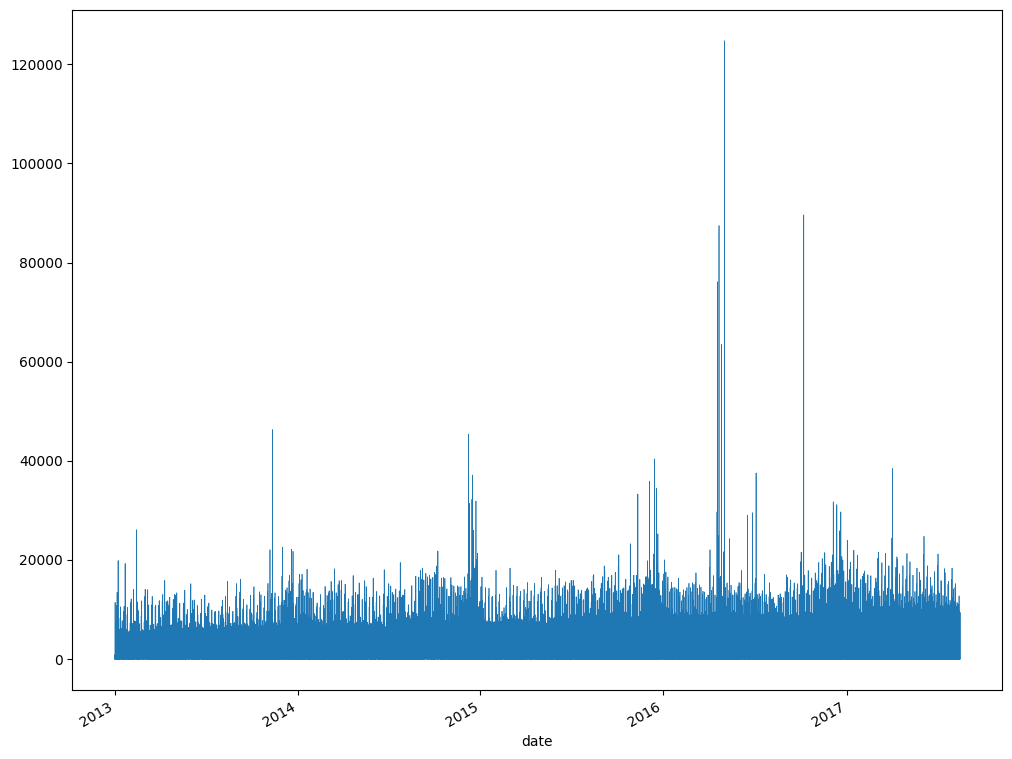

In [31]:
## Visualizing sales
plt.figure(figsize=(12,10))
df_train['sales'].plot(linewidth = 0.5)
plt.show()

## Multivariate Analysis

Multivariate analysis’ is the analysis of more than one variable and aims to study the relationships among them. This analysis might be done by computing some statistical indicators like the `correlation` and by plotting some charts.

Please, read [this article](https://towardsdatascience.com/10-must-know-seaborn-functions-for-multivariate-data-analysis-in-python-7ba94847b117) to know more about the charts.

## Which dates have the lowest and highest sales for each year?

In [32]:
# Highest sales each year
df_train1 = df_train.reset_index()
max_sales = df_train1.groupby(lambda x: df_train1['date'][x].year)["sales"].idxmax()
Result_max = df_train1.loc[max_sales]
Result_max


date       id  store_nbr     family       sales  onpromotion  \
562596  2013-11-12   562596         44  GROCERY I   46271.000            0   
1257246 2014-12-08  1257246         35  GROCERY I   45361.000            3   
1916586 2015-12-14  1916586         35  GROCERY I   40351.460            7   
2163723 2016-05-02  2163723          2  GROCERY I  124717.000           59   
2760297 2017-04-02  2760297          9  GROCERY I   38422.625           73   

         Year     Month      Day  
562596   2013  November  Tuesday  
1257246  2014  December   Monday  
1916586  2015  December   Monday  
2163723  2016       May   Monday  
2760297  2017     April   Sunday

In [33]:
# Visualization

sns.barplot(data=Result_max, y="date", x="sales")
plt.ylabel("Date")
plt.xlabel("Total sales")
plt.title("Highest daily sales by year ")
plt.show()

In [34]:
# lowest sales each year
min_sales = df_train1.groupby(lambda x: df_train1['date'][x].year)["sales"].idxmin()
Result_min = df_train1.loc[min_sales]
Result_min

date       id  store_nbr      family  sales  onpromotion  Year  \
0       2013-01-01        0          1  AUTOMOTIVE    0.0            0  2013   
648648  2014-01-01   648648          1  AUTOMOTIVE    0.0            0  2014   
1297296 2015-01-01  1297296          1  AUTOMOTIVE    0.0            0  2015   
1945944 2016-01-01  1945944          1  AUTOMOTIVE    0.0            0  2016   
2596374 2017-01-01  2596374          1  AUTOMOTIVE    0.0            0  2017   

           Month        Day  
0        January    Tuesday  
648648   January  Wednesday  
1297296  January   Thursday  
1945944  January     Friday  
2596374  January     Sunday

## Did the earthquake impact sales? YES

The earthquake happened on April 16th 2016
In the week of the earthquake (14th-21st April) increased highly compared to other week and peak on the day of the earth but brgan to plunge after the earththquake for almost two weeks before picking up again. To confirm the sales pattern was as a result of the earthquake and not just a general pattern during these two months, analysis of the other years is necessary for furthur insight.

Insight from the other years revealed that the earthquake impacted sales.

In [35]:
# Resample to weekly frequency, aggregating with mean
sales_daily_mean = df_train["sales"].resample('D').mean()
sales_weekly_mean = df_train["sales"].resample('W').mean()
sales_weekly_mean.head(3)

date
2013-01-06    206.843478
2013-01-13    190.285220
2013-01-20    189.835452
Freq: W-SUN, Name: sales, dtype: float64

In [36]:
# Sales for April, May 2016.


start, end = '2016-04', '2016-05'

# Analyse before and after the earthquake
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(sales_daily_mean.loc[start:end], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(sales_weekly_mean.loc[start:end], marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel("Total sales")
ax.set_xlabel("Date")
ax.tick_params(axis='x', labelrotation=45)
ax.legend()
ax.set_title("April and May 2016 sales")


Text(0.5, 1.0, 'April and May 2016 sales')

Text(0.5, 1.0, 'April and May 2013 sales')

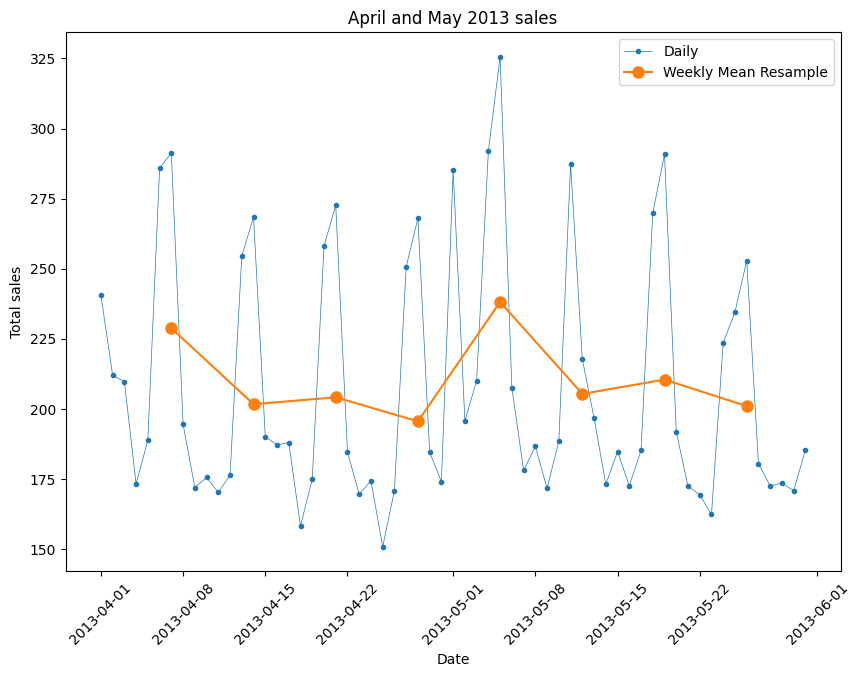

In [37]:
start, end = '2013-04', '2013-05'

# Analyse before and after the earthquake
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(sales_daily_mean.loc[start:end], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(sales_weekly_mean.loc[start:end], marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel("Total sales")
ax.set_xlabel("Date")
ax.tick_params(axis='x', labelrotation=45)
ax.legend()
ax.set_title("April and May 2013 sales")

Text(0.5, 1.0, 'April and May 2014 sales')

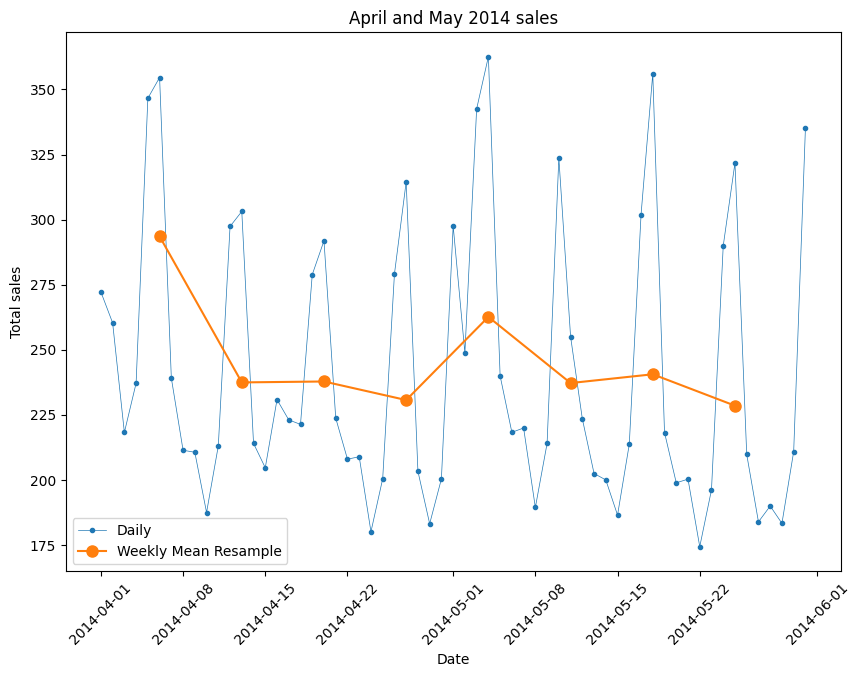

In [38]:
start, end = '2014-04', '2014-05'

# Analyse before and after the earthquake
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(sales_daily_mean.loc[start:end], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(sales_weekly_mean.loc[start:end], marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel("Total sales")
ax.set_xlabel("Date")
ax.tick_params(axis='x', labelrotation=45)
ax.legend()
ax.set_title("April and May 2014 sales")

Text(0.5, 1.0, 'April and May 2015 sales')

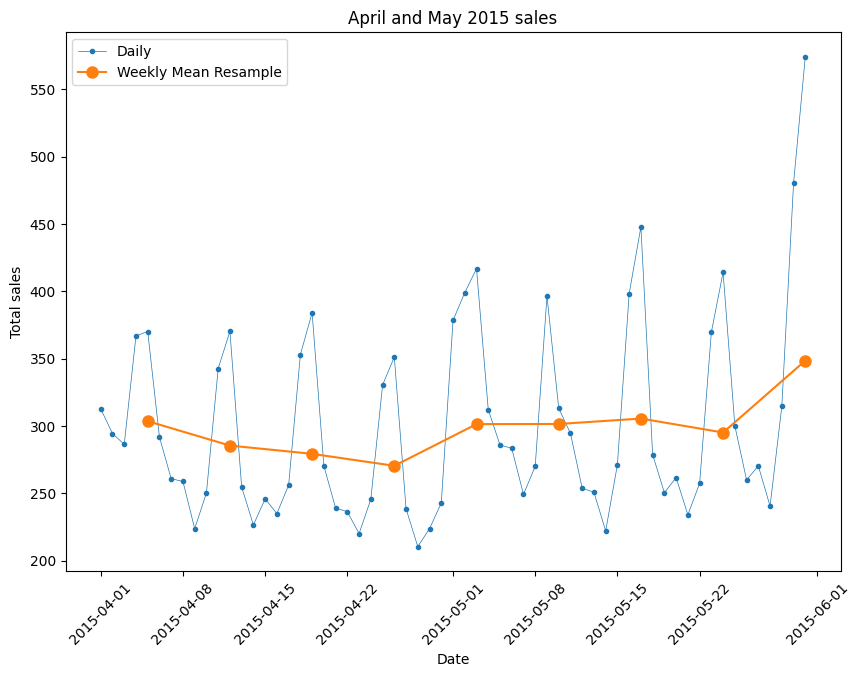

In [39]:
start, end = '2015-04', '2015-05'

# Analyse before and after the earthquake
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(sales_daily_mean.loc[start:end], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(sales_weekly_mean.loc[start:end], marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel("Total sales")
ax.set_xlabel("Date")
ax.tick_params(axis='x', labelrotation=45)
ax.legend()
ax.set_title("April and May 2015 sales")

In [40]:
start, end = '2017-04', '2017-05'

# Analyse before and after the earthquake
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(sales_daily_mean.loc[start:end], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(sales_weekly_mean.loc[start:end], marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel("Total sales")
ax.set_xlabel("Date")
ax.tick_params(axis='x', labelrotation=45)
ax.legend()
ax.set_title("April and May 2017 sales")

Text(0.5, 1.0, 'April and May 2017 sales')

## Are certain groups of stores selling more products? (Cluster, city, state, type)

In [41]:
# load store data

df_stores = pd.read_csv("D:\LP2/stores.csv")
df_stores.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [42]:
#check store data info

df_stores.isna().sum()
df_stores.duplicated().sum()


0

In [43]:
# sort sales of product by store number

stores_product = df_train.groupby(["store_nbr", "family"])["sales"].sum()
pd.set_option("display.max_rows", None )
stores_product.head()

store_nbr  family    
1          AUTOMOTIVE       5475.0
           BABY CARE           0.0
           BEAUTY           4056.0
           BEVERAGES     2673769.0
           BOOKS             211.0
Name: sales, dtype: float64

In [45]:
#maximum sales of each store

stores_sales = df_train.groupby(lambda x: df_train["store_nbr"][x])["sales"].idxmax()

In [ ]:
stores_sales.sort_values(ascending=False)
stores_sales.head()

In [ ]:
stores_sales1 = df_train.groupby(lambda x: df_train["store_nbr"][x])["sales"].sum()
stores_sales1.sort_values(ascending=False)
stores_sales1.head()

In [ ]:
df_train_stores = pd.merge(df_train, df_stores)
df_train_stores.head()

C:\Users\clali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

C:\Users\clali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



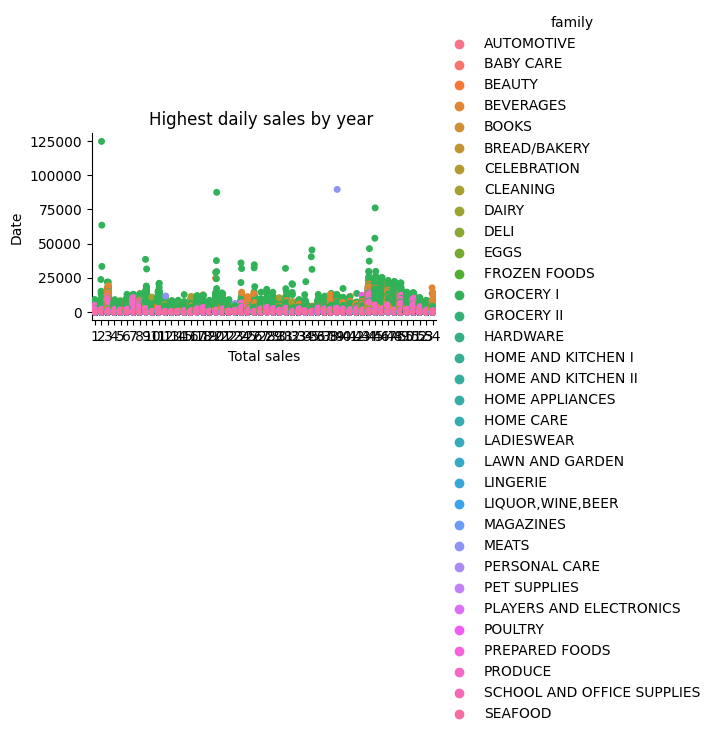

In [ ]:
sns.catplot(data=df_train, x="store_nbr", y="sales", hue="family")
plt.ylabel("Date")
plt.xlabel("Total sales")
plt.title("Highest daily sales by year ")
plt.show()


## Are sales affected by promotions, oil prices and holidays?

In [ ]:
on_promotion = df_train.groupby(["onpromotion", "family"])["sales"].sum()

on_promotion.head

# Feature processing
Here is the section to **clean** and **process** the features of the dataset.

## Missing/NaN Values
Handle the missing/NaN values using the Scikif-learn SimpleImputer

In [ ]:
# Code Here

## Scaling
Scale the numeric features using the Scikif-learn StandardScaler, MinMaxScaler, or another Scaler.

In [ ]:
# Code here

## Encoding
Encode the categorical features using the Scikif-learn OneHotEncoder.

In [ ]:
# Code here